# Principal components analysis

- Principal component analysis (PCA) is a linear dimensionality reduction technique.

## Eigenvectors and eigenvalues

- PCA relys on eigenvectors and eigenvalues to work. So before touching the main topic, we need to firstly explore what are eigenvectors and eigenvalues.

- The eigenvectors are the non-zero vectors that satisfy the equation:

  $$
  A\vec{x} = \lambda\vec{x}
  $$

  where A is the matrix, v is the eigenvector, and λ is the corresponding eigenvalue.

- Geometrically, $\vec{x}$ of a square matrix $A$ is a vector that does not change direction when multiplied by A.

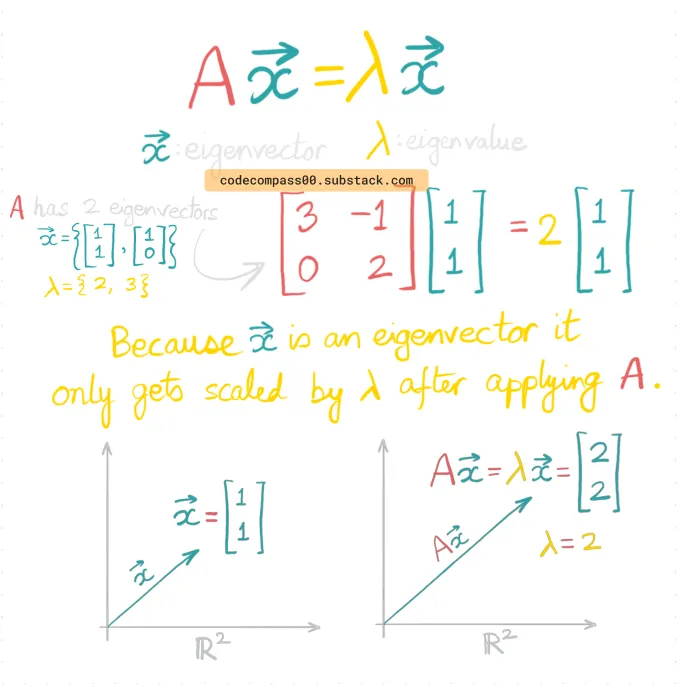

- For a square matrix of size `n * n`, there can be at most `n` unique eigenvalues, and therefore at most n linearly independent eigenvectors.

- If someone hands you a matrix $A$ and a vector $\vec{v}$, it is easy to check if $\vec{v}$ is an eigenvector of $A$: simply multiply $\vec{v}$ by $A$ and see if $A\vec{v}$ is a scalar multiple of $\vec{v}$. On the other hand, given just the matrix $A$, it is not obvious at all how to find the eigenvectors.
  - Given the intention of these notes, we will leave the task of finding eigenvectors to PyTorch.

In [23]:
import torch

# Create a sample matrix
A = torch.tensor([[2, 1, 8], 
                  [1, 3, 1],
                  [0, 1, 2]], dtype=torch.float32)

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = torch.linalg.eig(A)

# Convert eigenvalues to real-valued tensors
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real


print(f"Eigenvectors:\n{eigenvectors}")
print()
print(f"Eigenvalues:\n{eigenvalues}")


# Demonstrate the relationship
# Matrix times eigenvectors should equal eigenvalues times eigenvectors
for i in range(A.size(0)):
    eigenvector = eigenvectors[:, i]
    eigenvalue = eigenvalues[i]
    print(f"\nFor eigenvector {i}:")
    print(f"Av = {torch.matmul(A, eigenvector)}")
    print(f"λv = {eigenvalue * eigenvector}")

Eigenvectors:
tensor([[ 0.7976, -0.9079, -0.9079],
        [ 0.5673,  0.2270,  0.2270],
        [ 0.2050,  0.0719,  0.0719]])

Eigenvalues:
tensor([4.7673, 1.1163, 1.1163])

For eigenvector 0:
A @ eigenvector = tensor([3.8024, 2.7045, 0.9773])
eigenvalue * eigenvector = tensor([3.8024, 2.7045, 0.9773])

For eigenvector 1:
A @ eigenvector = tensor([-1.0135, -0.1551,  0.3708])
eigenvalue * eigenvector = tensor([-1.0135,  0.2534,  0.0803])

For eigenvector 2:
A @ eigenvector = tensor([-1.0135, -0.1551,  0.3708])
eigenvalue * eigenvector = tensor([-1.0135,  0.2534,  0.0803])
